In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

In [3]:
df = pd.read_csv("student_cgpa.csv")
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [4]:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [5]:
df.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [7]:
df.duplicated().sum()

7

In [8]:
df.sample(10)

,cgpa,iq
32,8.83,118
166,6.10,109
123,8.72,119
121,5.69,109
113,5.67,111
50,5.14,83
111,8.86,117
12,8.16,97
69,8.29,95
29,5.43,106


In [30]:
df = df.drop_duplicates()
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [31]:
df.corr()

,cgpa,iq
cgpa,1.000000,0.517675
iq,0.517675,1.000000


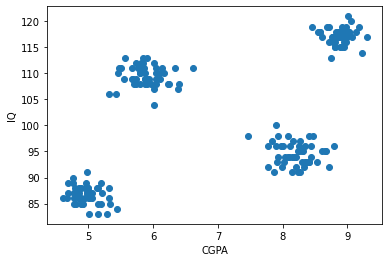

In [9]:
plt.scatter(df['cgpa'], df['iq'])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for i in range(1,11):
  Km = KMeans(n_clusters = i)
  Km.fit_predict(df)
  wcss.append(Km.inertia_)

C:\Users\Ritesh Sankhyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


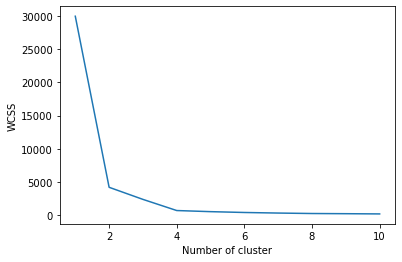

In [13]:
plt.plot(range(1,11) , wcss)
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [15]:
x = df.values
x

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [16]:
Km  = KMeans(n_clusters = 4,random_state = 42)
y_means = Km.fit_predict(x)
y_means

array([0, 2, 3, 3, 2, 2, 3, 1, 2, 3, 0, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3, 0,
       3, 0, 0, 3, 0, 1, 3, 2, 1, 2, 1, 2, 3, 3, 1, 2, 0, 2, 0, 3, 3, 0,
       1, 1, 3, 2, 1, 2, 0, 0, 1, 3, 1, 2, 2, 1, 2, 1, 2, 3, 3, 1, 0, 1,
       3, 0, 2, 3, 2, 1, 3, 0, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 3, 0, 3, 3, 1, 3, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 1,
       3, 1, 2, 2, 3, 1, 3, 2, 1, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 3, 2,
       0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1,
       0, 3, 2, 1, 2, 3, 0, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 1, 2, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 0, 1, 2,
       2, 1])

In [17]:
x[y_means ==0]

array([[ 5.13, 88.  ],
       [ 4.6 , 86.  ],
       [ 5.  , 88.  ],
       [ 4.86, 86.  ],
       [ 4.78, 87.  ],
       [ 4.96, 88.  ],
       [ 4.86, 87.  ],
       [ 5.44, 84.  ],
       [ 5.34, 85.  ],
       [ 5.31, 86.  ],
       [ 5.14, 83.  ],
       [ 4.95, 86.  ],
       [ 5.21, 87.  ],
       [ 4.91, 85.  ],
       [ 5.28, 83.  ],
       [ 5.15, 88.  ],
       [ 4.9 , 85.  ],
       [ 4.89, 88.  ],
       [ 5.05, 86.  ],
       [ 4.98, 91.  ],
       [ 5.01, 86.  ],
       [ 4.95, 88.  ],
       [ 4.96, 89.  ],
       [ 4.85, 86.  ],
       [ 4.76, 90.  ],
       [ 4.98, 87.  ],
       [ 4.78, 87.  ],
       [ 5.2 , 85.  ],
       [ 5.05, 87.  ],
       [ 5.01, 83.  ],
       [ 4.77, 86.  ],
       [ 4.68, 87.  ],
       [ 4.81, 85.  ],
       [ 5.03, 87.  ],
       [ 4.98, 87.  ],
       [ 5.32, 88.  ],
       [ 4.86, 88.  ],
       [ 4.89, 85.  ],
       [ 4.88, 86.  ],
       [ 5.01, 86.  ],
       [ 4.67, 86.  ],
       [ 5.15, 85.  ],
       [ 4.97, 88.  ],
       [ 4.

In [18]:
x[y_means == 0,0]

array([5.13, 4.6 , 5.  , 4.86, 4.78, 4.96, 4.86, 5.44, 5.34, 5.31, 5.14,
       4.95, 5.21, 4.91, 5.28, 5.15, 4.9 , 4.89, 5.05, 4.98, 5.01, 4.95,
       4.96, 4.85, 4.76, 4.98, 4.78, 5.2 , 5.05, 5.01, 4.77, 4.68, 4.81,
       5.03, 4.98, 5.32, 4.86, 4.89, 4.88, 5.01, 4.67, 5.15, 4.97, 4.87,
       5.2 , 4.99, 4.79, 4.76, 4.78, 4.68])

In [19]:
x[y_means == 0,1]

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

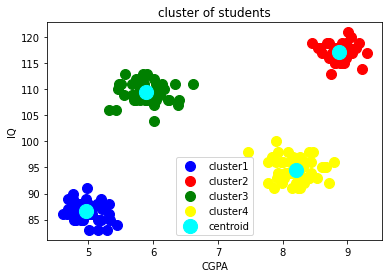

In [21]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, color = "blue", label = "cluster1")
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, color = "red", label = "cluster2")
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, color = "green", label = "cluster3")
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, color = "yellow", label = "cluster4")

plt.scatter(Km.cluster_centers_[:, 0], Km.cluster_centers_[:, 1], s = 200, color = "cyan", label = "centroid")

plt.title("cluster of students")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend()
plt.show()

In [22]:
import pickle
pickle_out = open("Km.pkl","wb")
pickle.dump(Km, pickle_out)
pickle_out.close()